# Titanic Challenge


## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [70]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
#pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

## Local library import
We import all the required local libraries libraries

In [71]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [72]:
df = pd.read_csv('../Dataset/train.csv')

# Data Exploration
Put here the core of the notebook. Feel free di further split this section into subsections.

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.shape

(891, 12)

Let's run describe() to get general sense of the data

In [75]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It can be observed that the count is less for Age column. Means some data is missing. Let's append the missing data using median.

In [76]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So we replaced the null values using median.

Let's visualize gender based survival

In [78]:
df['Died'] = 1 - df['Survived']

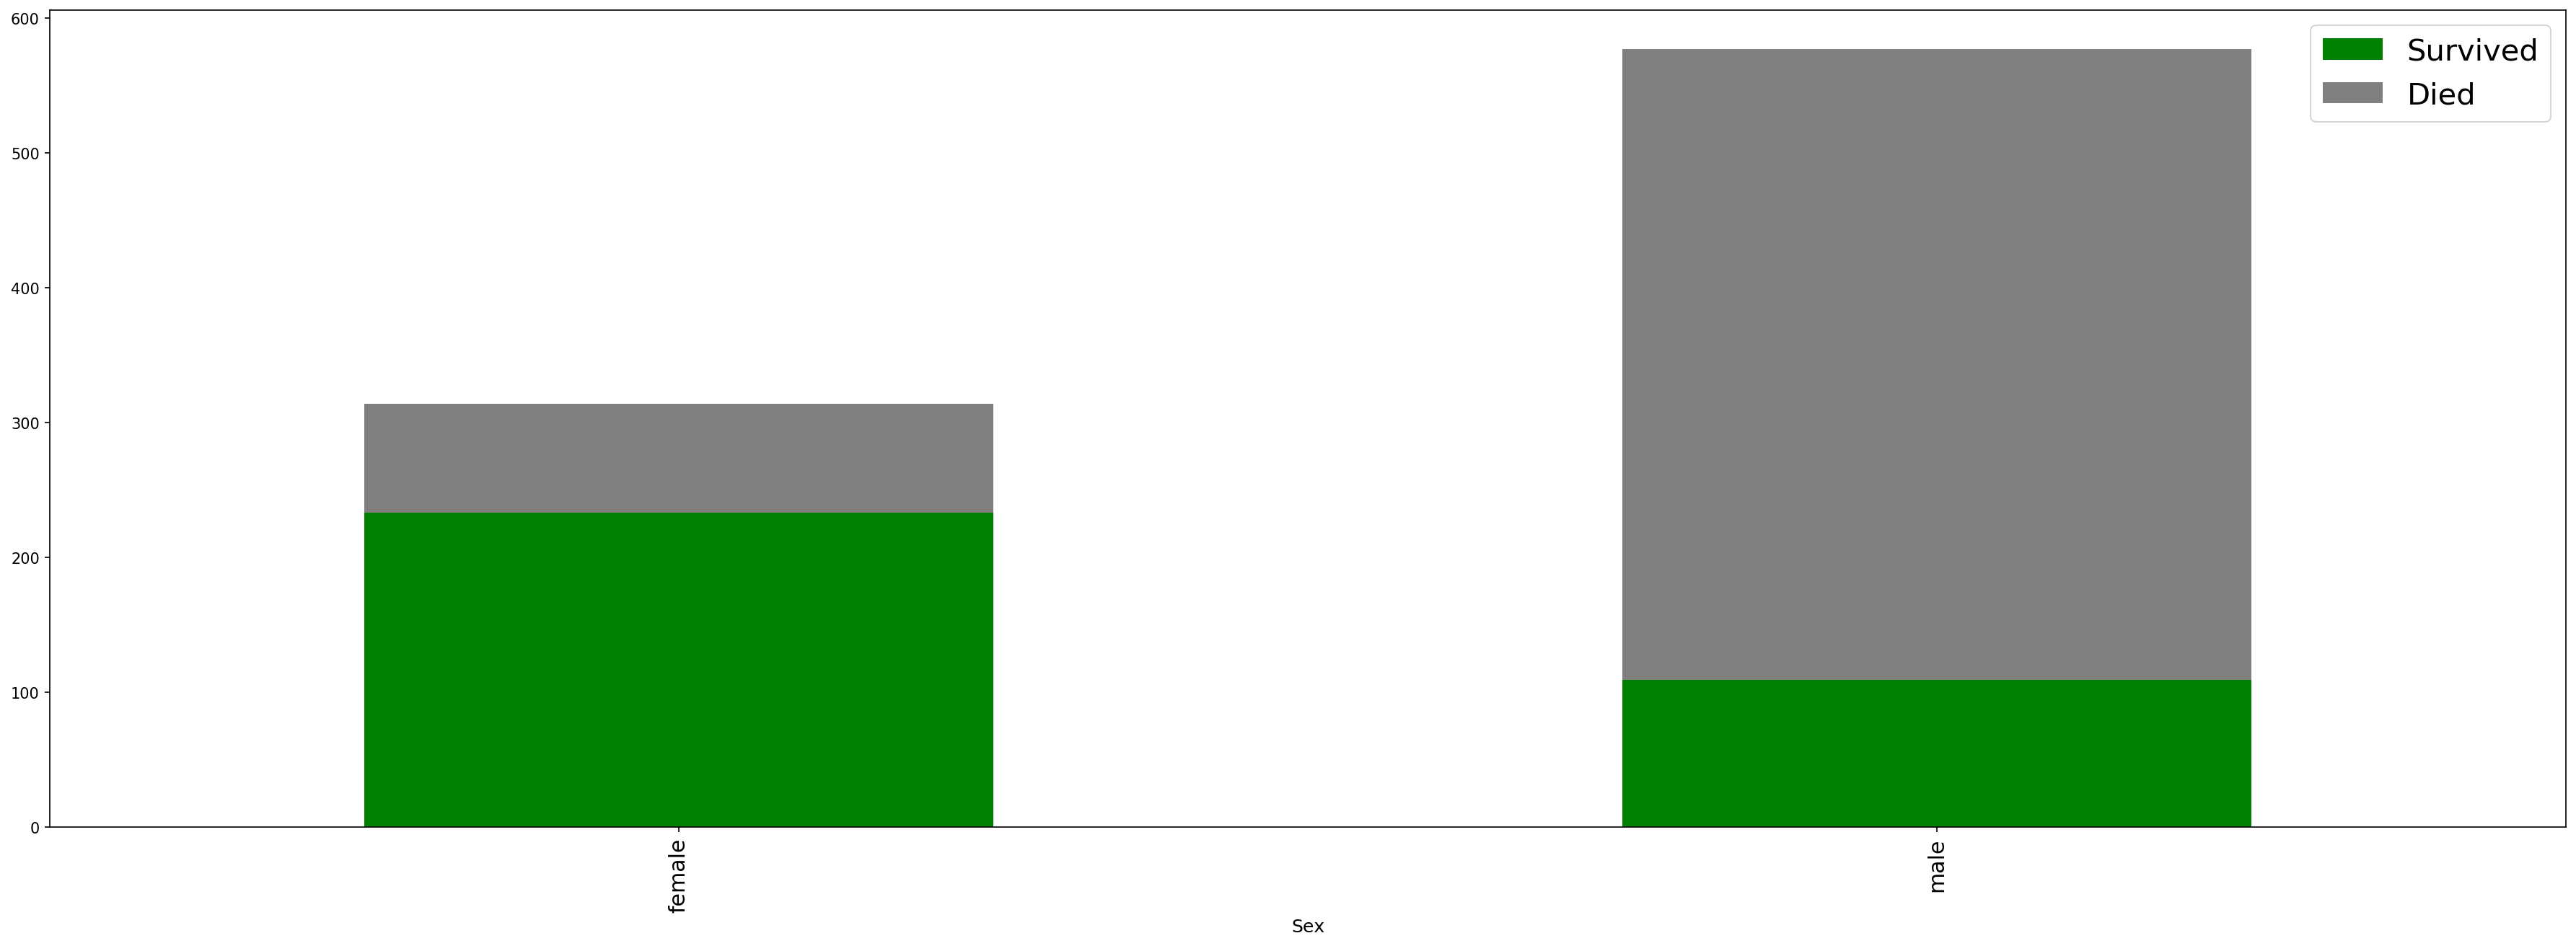

In [79]:
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(30,10), stacked=True, colors=['g', 'grey']);

So, it looks like female survival is high.

Let's plot the same graph using ratio

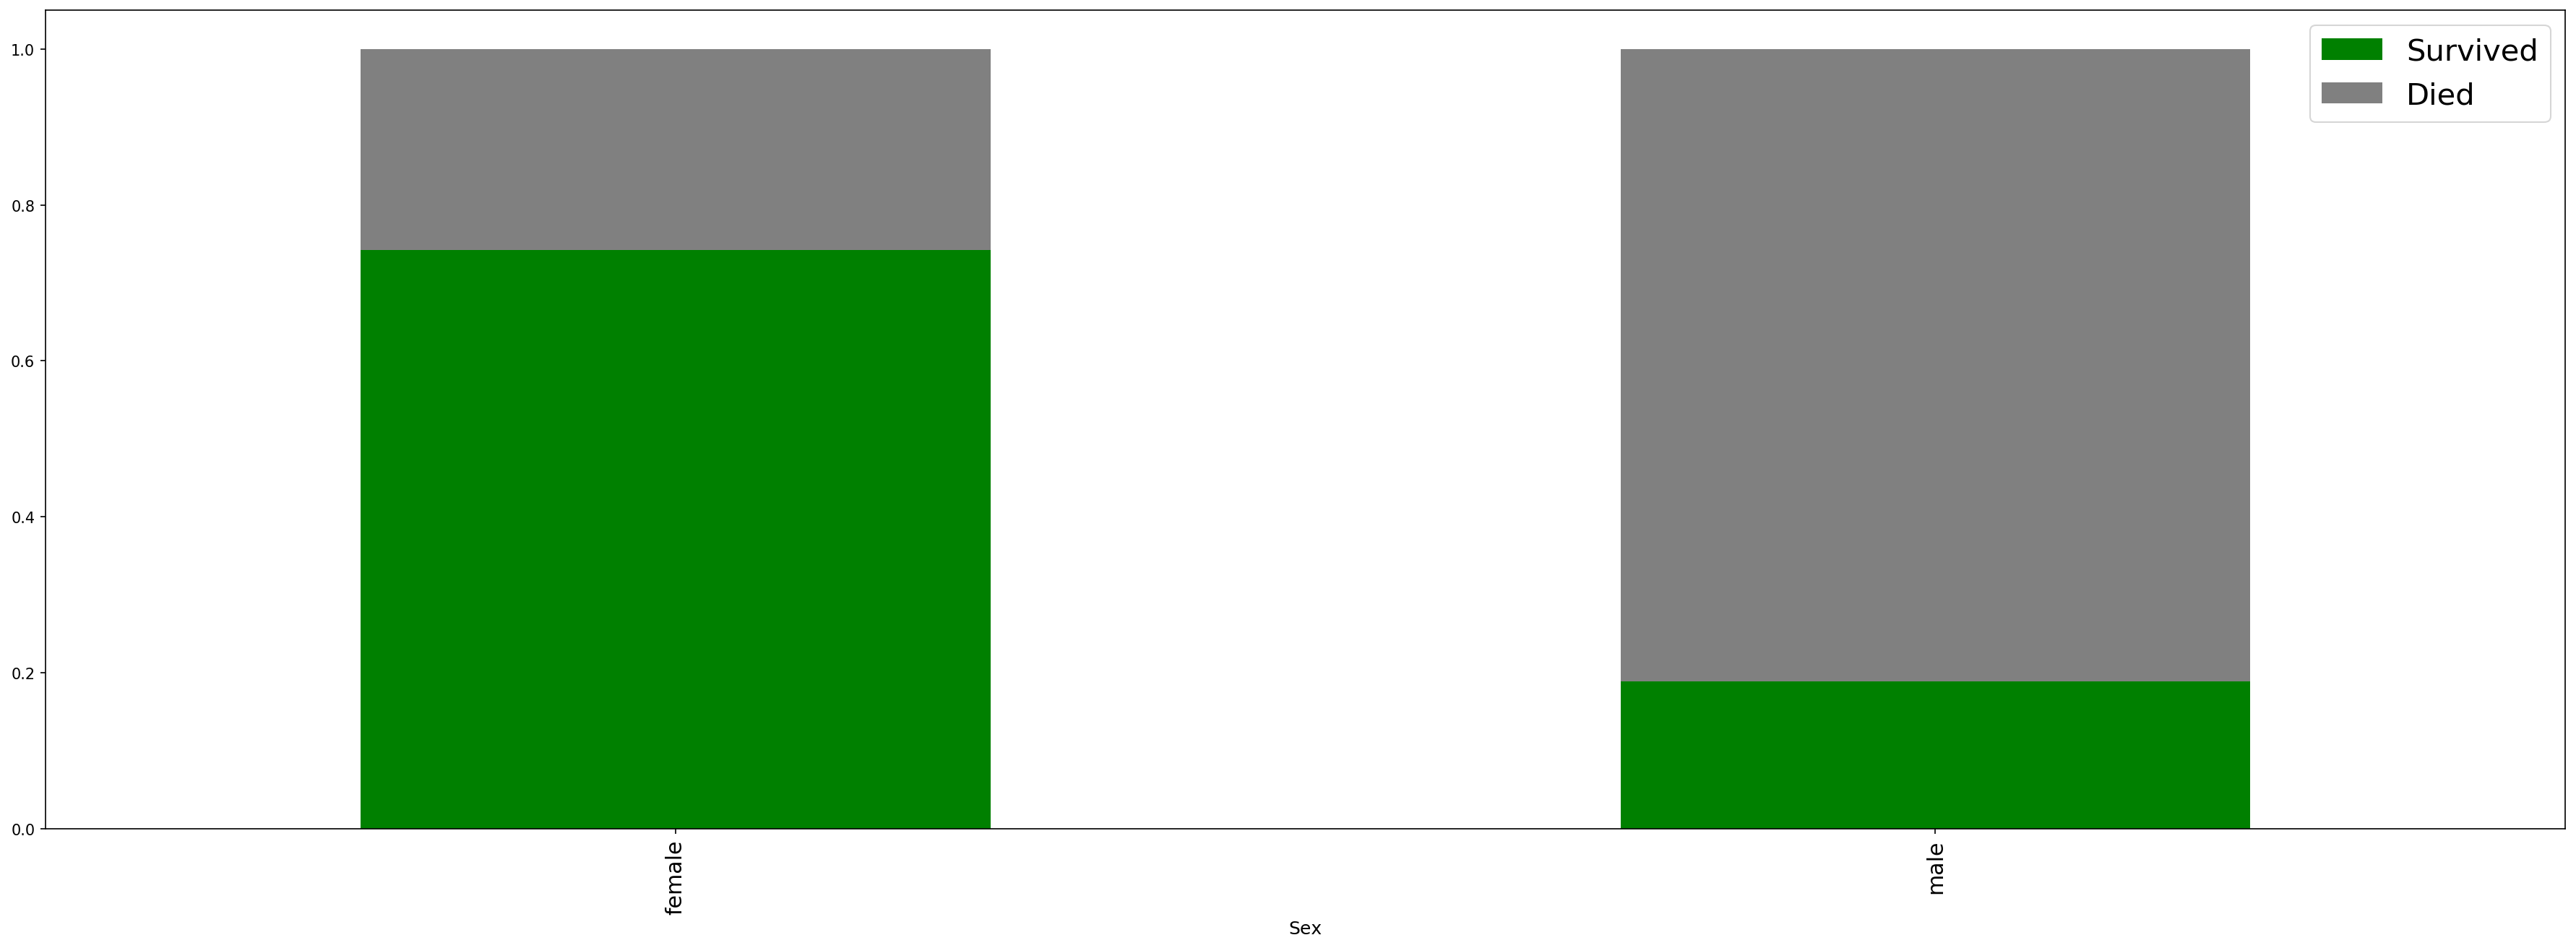

In [80]:
df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(30,10), stacked=True, colors=['g', 'grey']);

Let's make a correlation between survival and age 

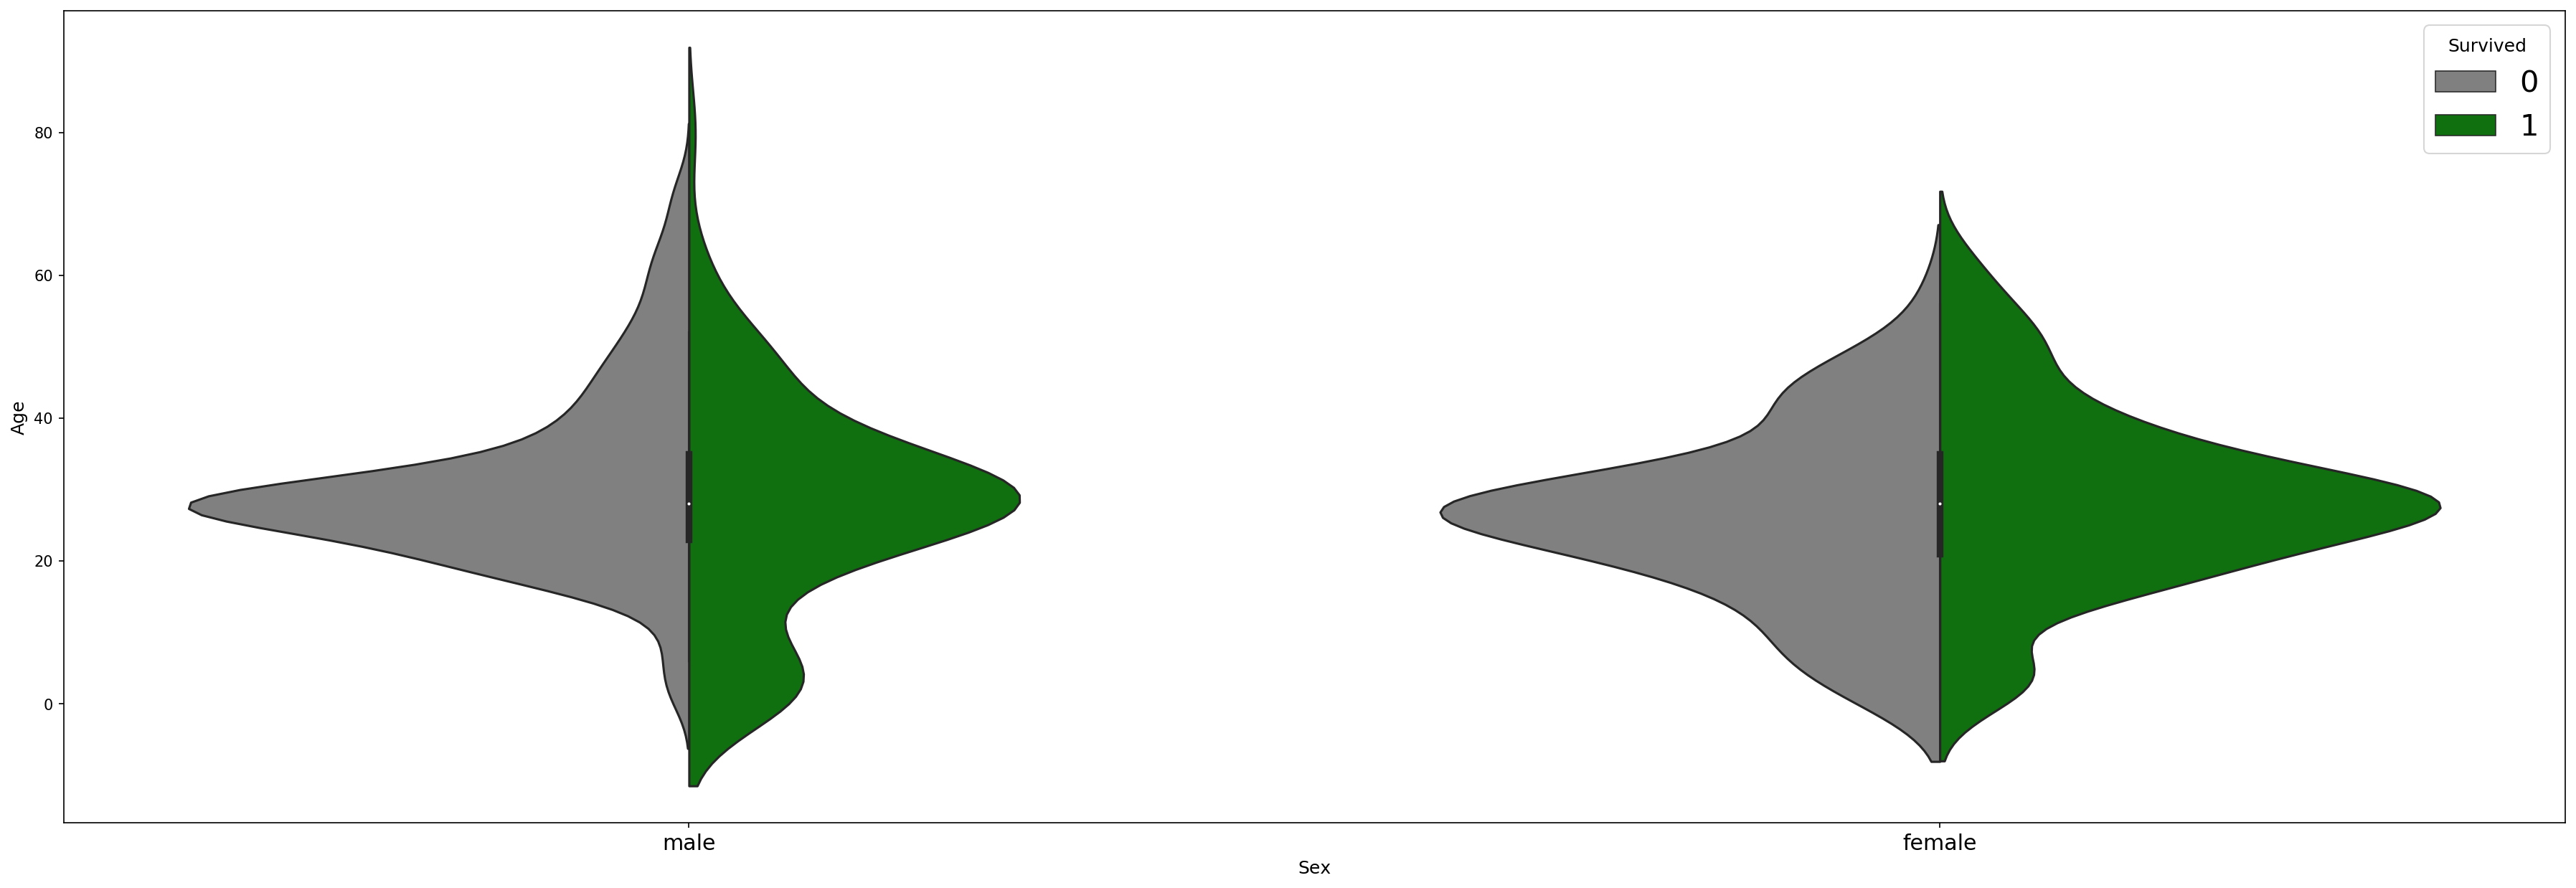

In [81]:
fig = plt.figure(figsize=(30,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'grey', 1: 'green'});


This confirms more women survival (larger green histogram in case of female)

Now, for male:
- Younger tend to survive
- Age between 20 to 40 died in large number

For female no clear relation is observed between age and survival

Let's try to correlate the fare ticket and survival 

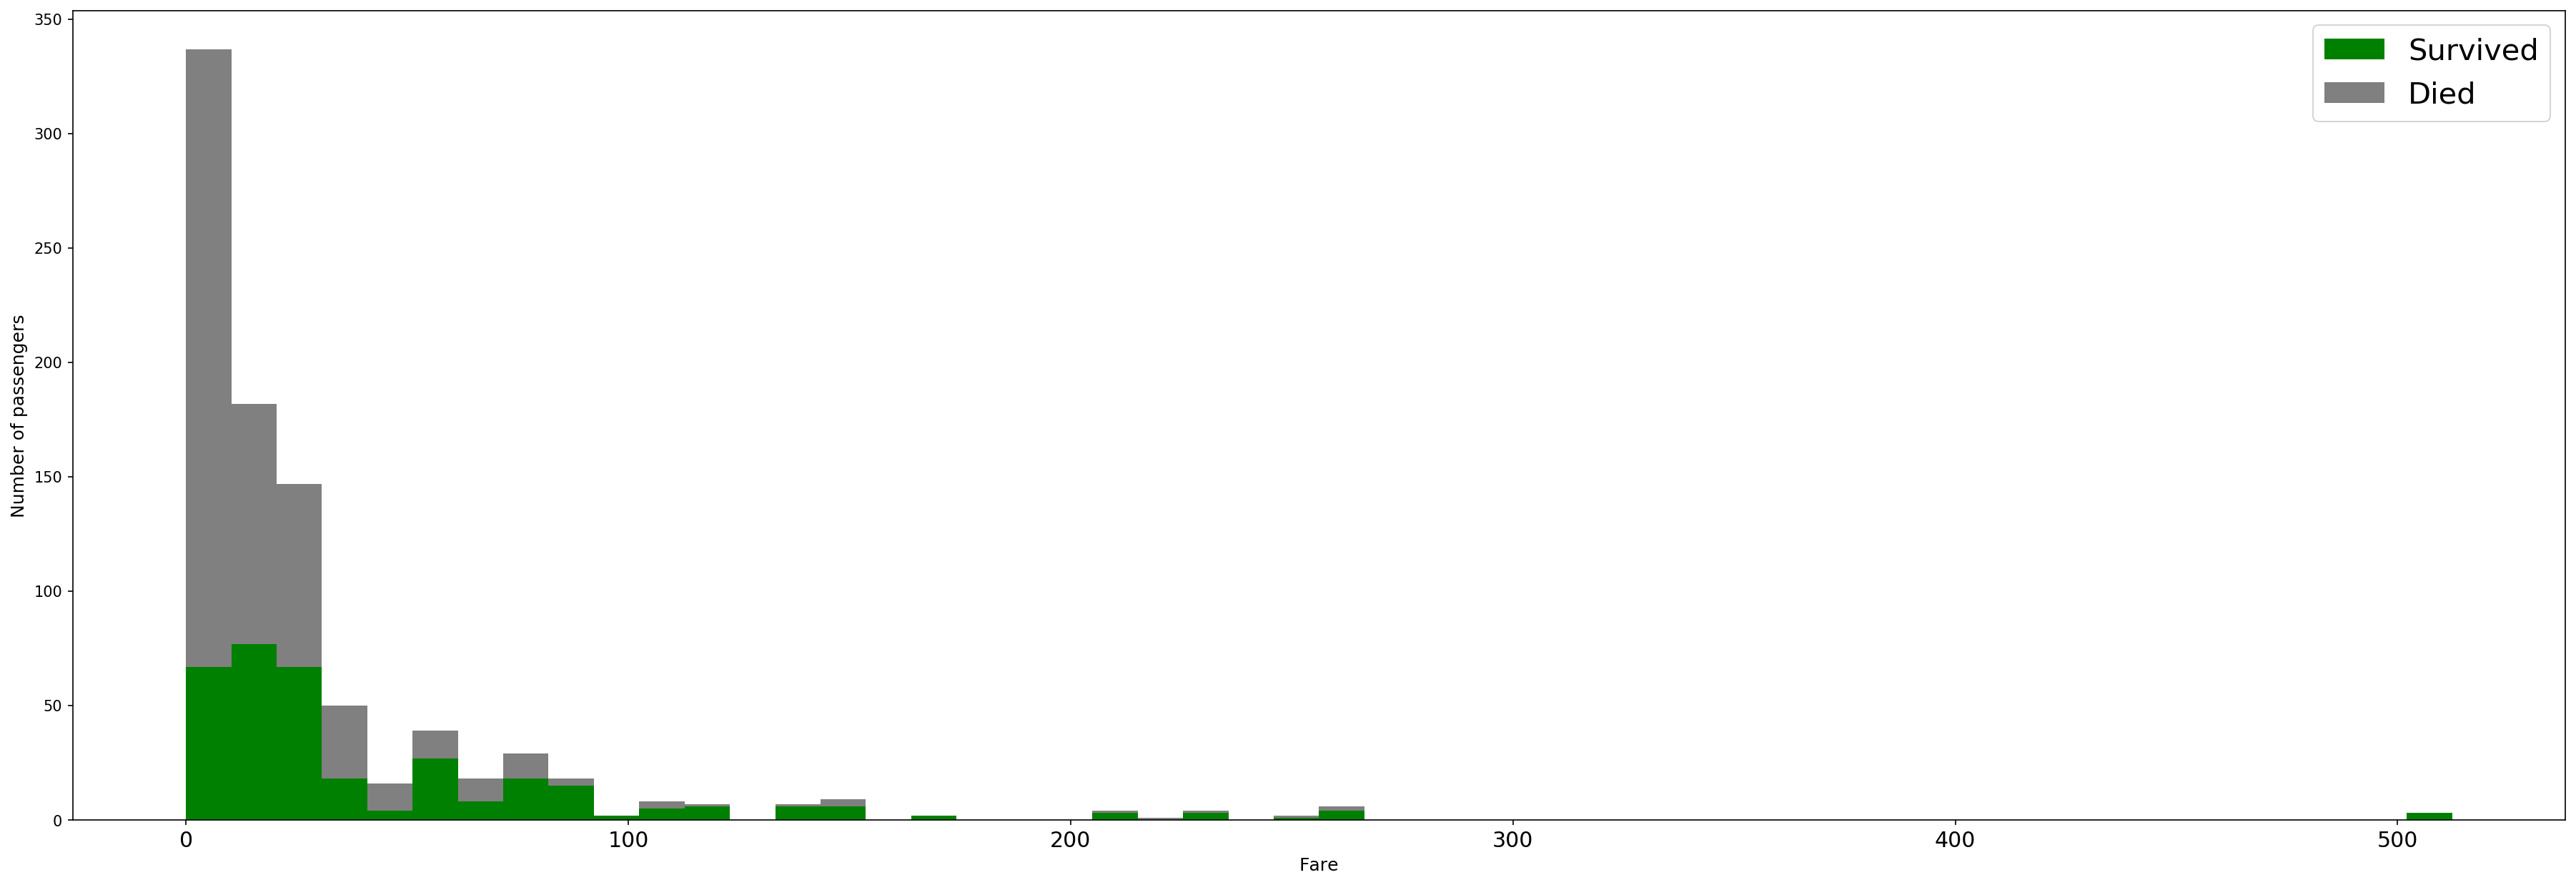

In [82]:
fig = plt.figure(figsize=(30,10))

plt.hist([df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']],
         stacked=True, color=['green','grey'], bins=50, label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Passengers with cheap tickets are more likely to die than with expensive tickets. 

Let's combine fare, age, and survival together

Text(0, 0.5, 'Fare')

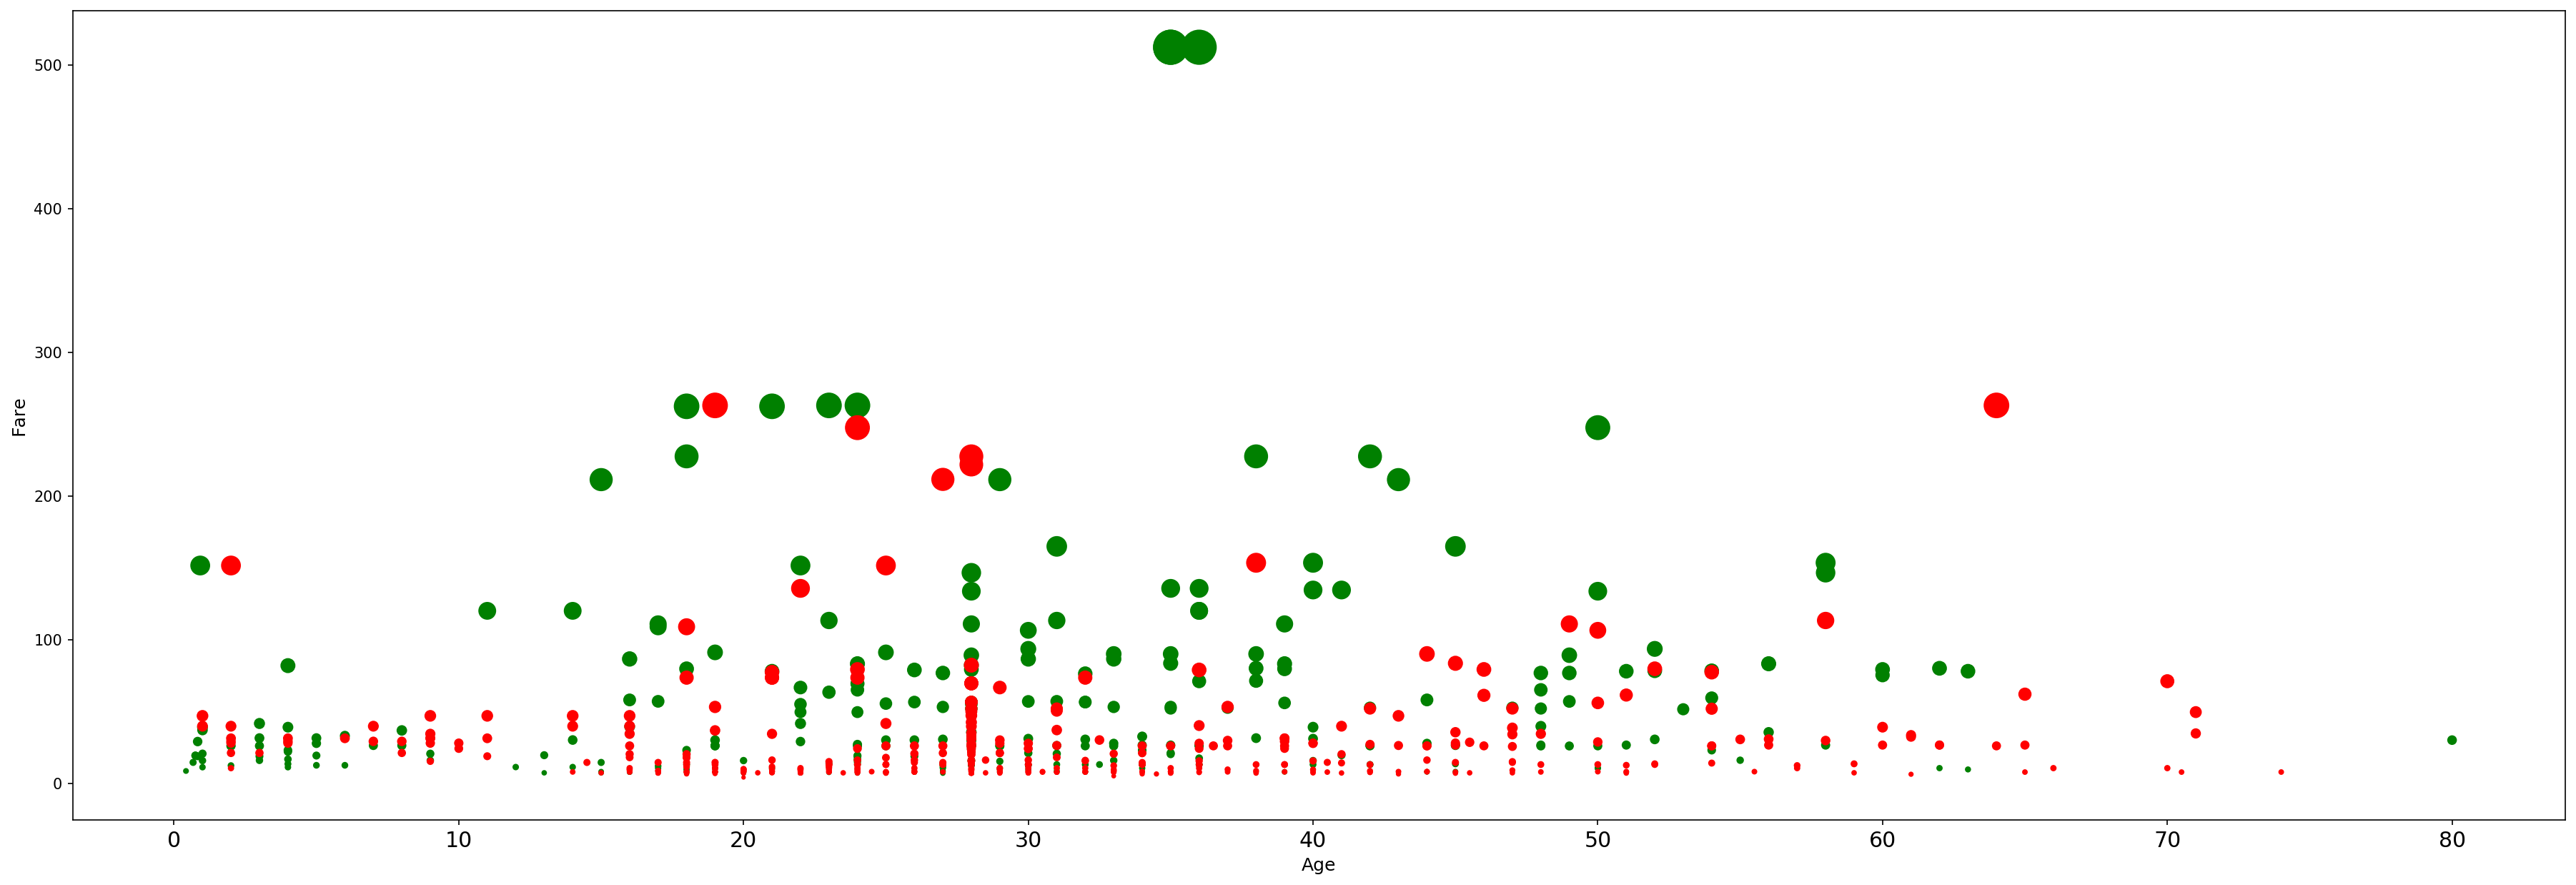

In [83]:
fig = plt.figure(figsize=(30,10))

plt.scatter(df[df['Survived']==1]['Age'], 
            df[df['Survived']==1]['Fare'], c='green', s=df[df['Survived']==1]['Fare'])

plt.scatter(df[df['Survived']==0]['Age'], 
            df[df['Survived']==0]['Fare'], c='red', s=df[df['Survived']==0]['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

Mostly, dotes with small size(low fares) are died (red). On the other hand, dotes with large radius survived (high fares, green). 

There are some green dotes below 10 years age which indicates children survival.

Also, we can see that fare directly correlates with Pclass. 

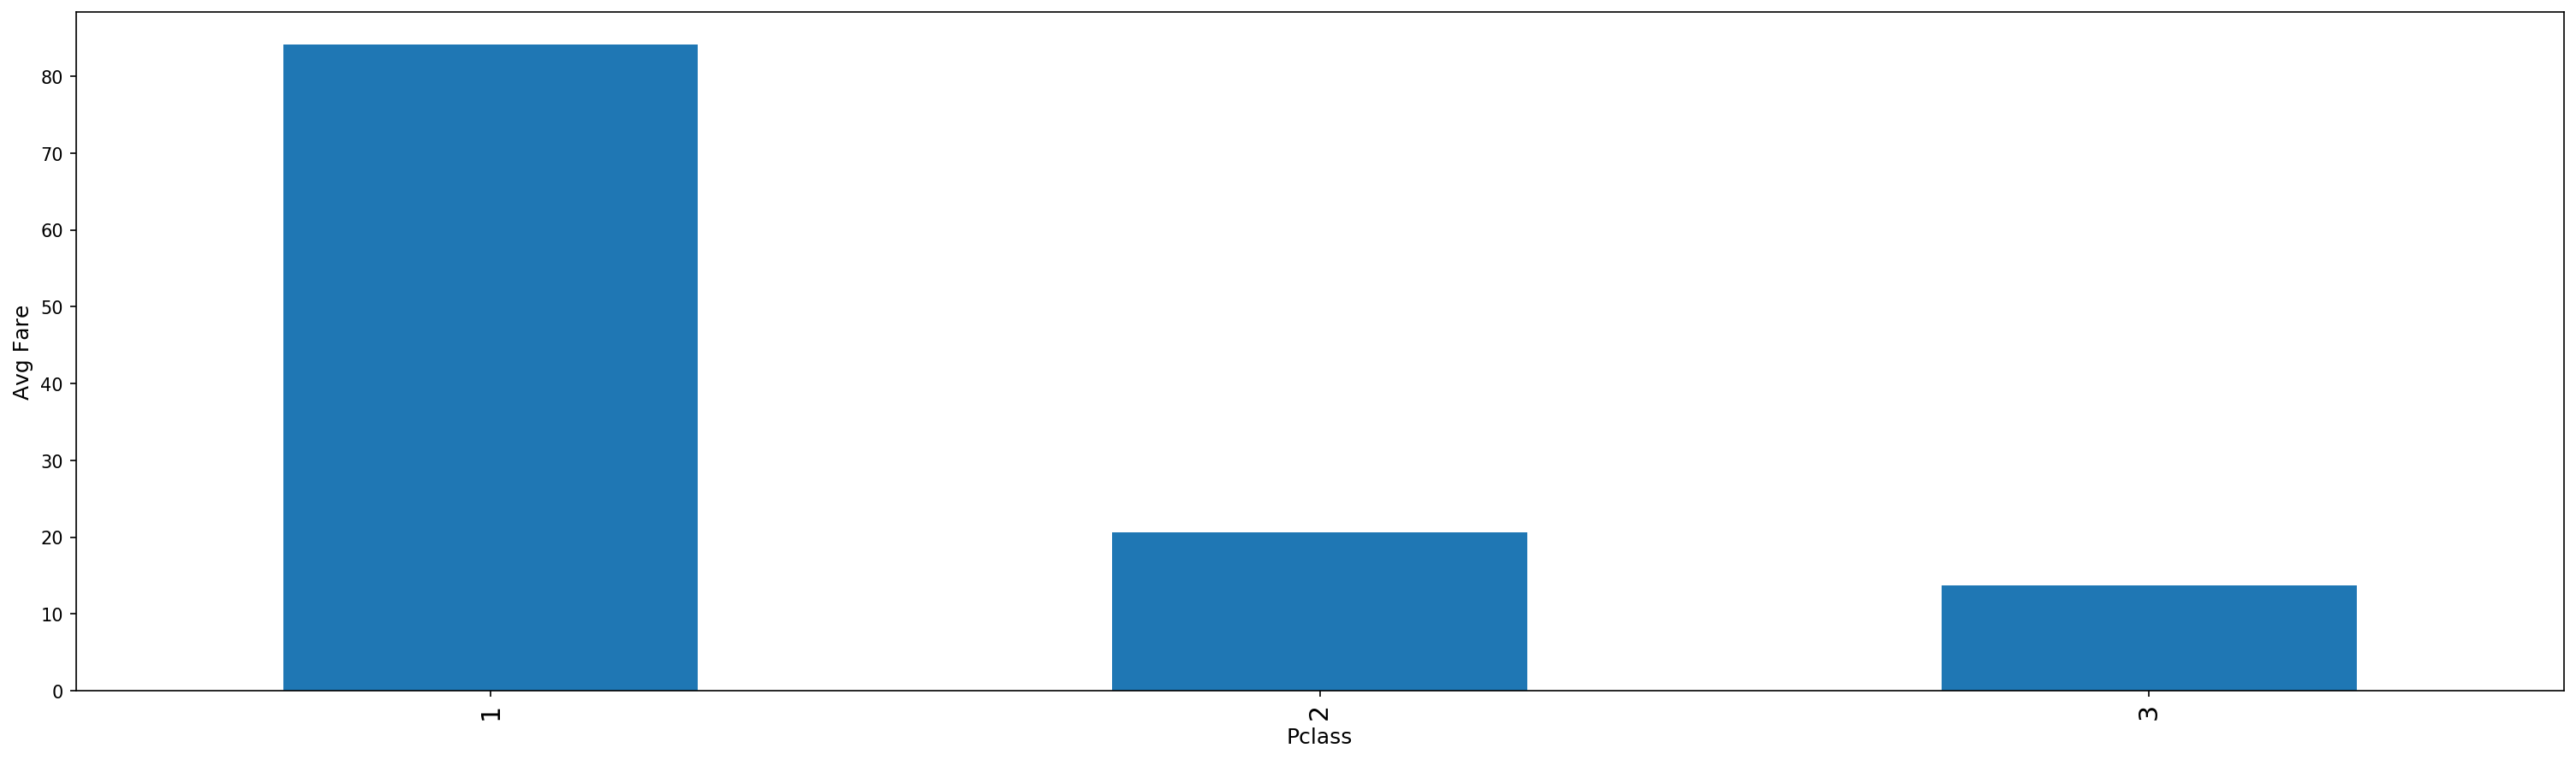

In [84]:
ax = plt.subplot()
ax.set_ylabel('Avg Fare')
df.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax=ax);

Let's see how the embarkation site affects the survival

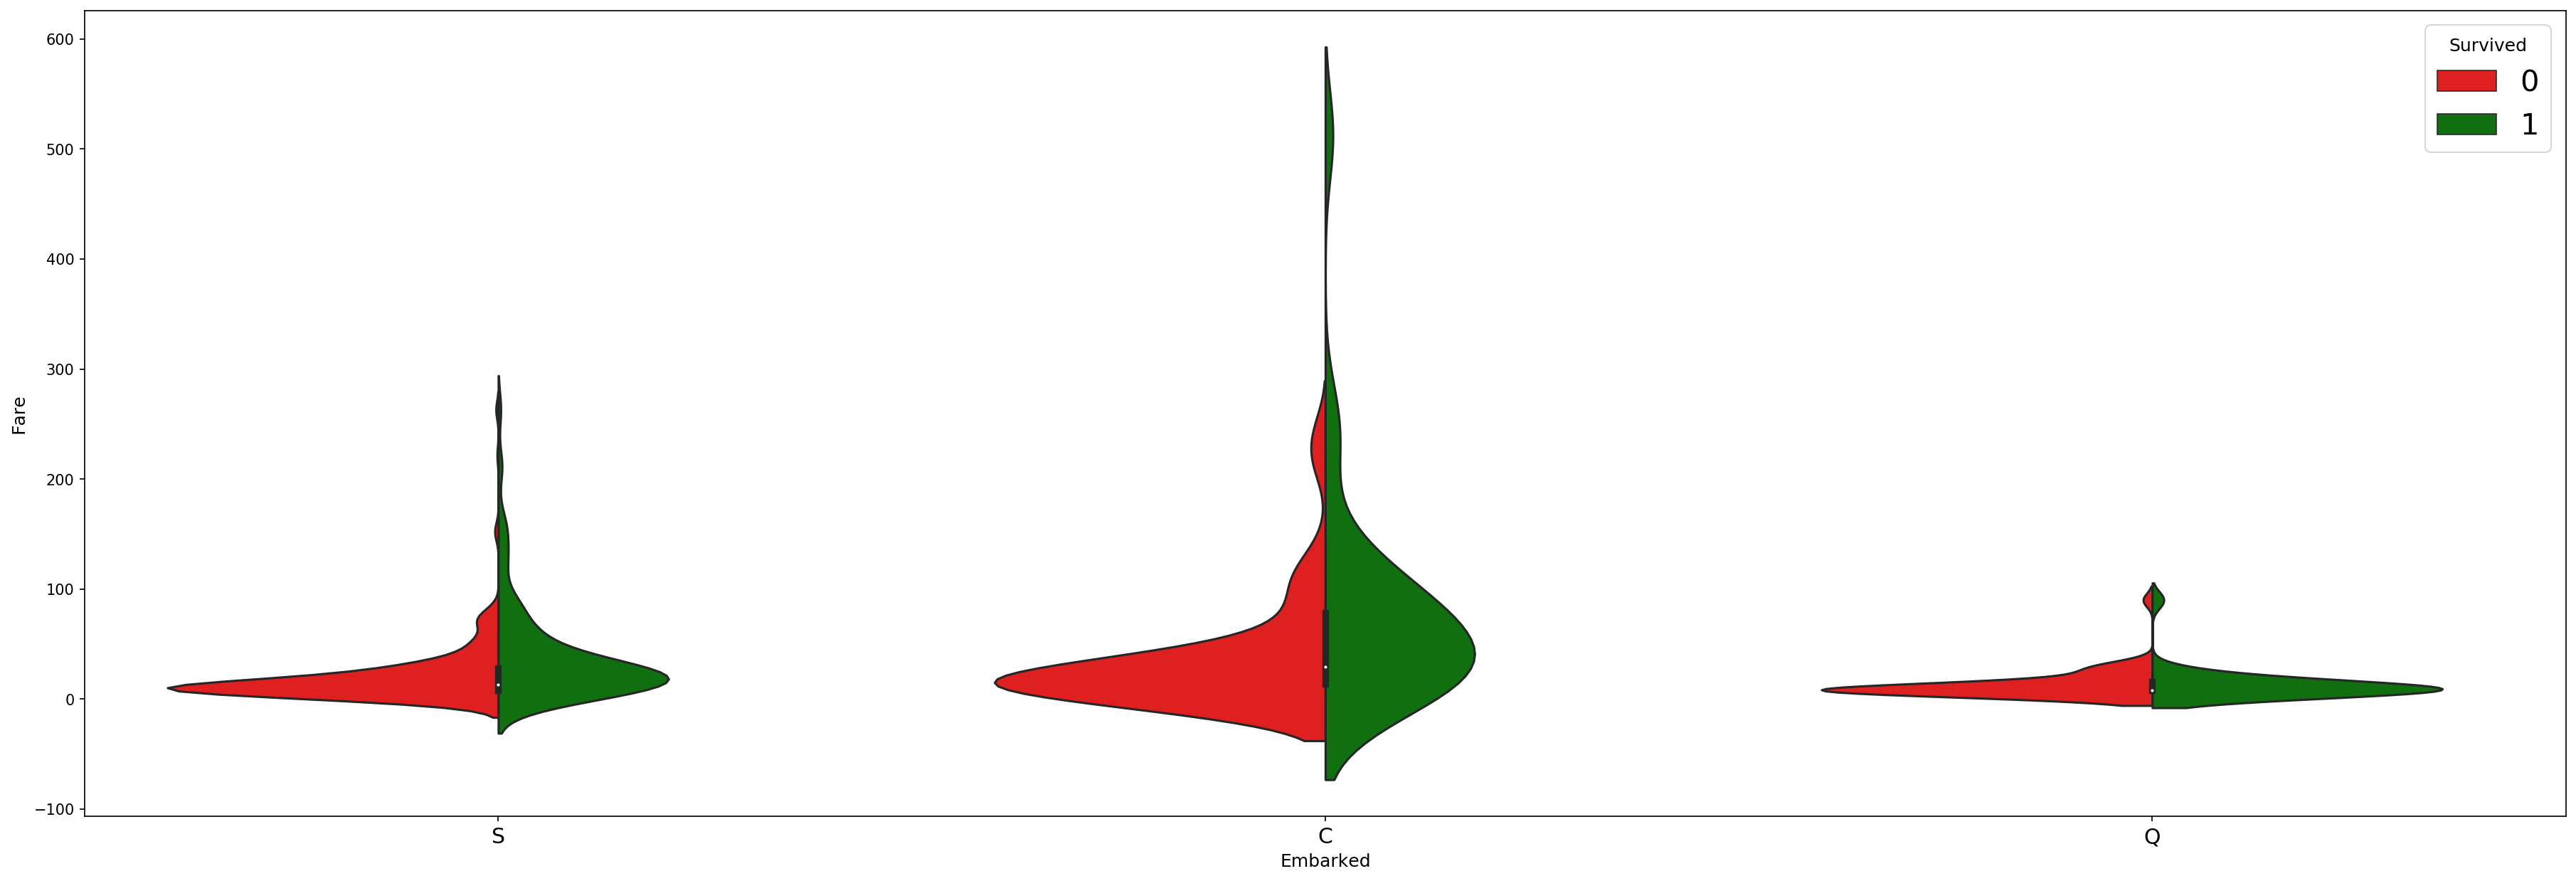

In [85]:
fig = plt.figure(figsize=(30,10))
sns.violinplot(x='Embarked',y='Fare',hue='Survived', data=df, split=True, palette={0:'r',1:'g'});

# Feature Engineering

Let's define a simple function 

In [86]:
def status(feature):
    print('Processing', feature, ': ok')

Let's load the training and test data and append them together.

In [87]:
def get_combined_data():
    
    train = pd.read_csv('../Dataset/train.csv') # Reading train data
    test = pd.read_csv('../Dataset/test.csv') # Reading test data
    
    targets = train.Survived # Extracting target
    train.drop(['Survived'], 1, inplace=True) # Dropping the target variable from train data
    
    combined = train.append(test) # Merging train and test data
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1) # Dropping index and Passenger Id columns
    
    return combined

In [88]:
combined = get_combined_data()

Let's explore the combined data

In [89]:
combined.shape

(1309, 10)

In [90]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Extracting the Passenger Titles

In [91]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [92]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [93]:
Title_dict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    combined['Title'] = combined.Title.map(Title_dict)
    
    status('Title')
    return combined

In [94]:
combined = get_titles()

Processing Title : ok


In [95]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Now, the title column is there. Let's check for null values,

In [96]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


It's clear that the row 1305 is from test data and not encountered in train data. 

## Processing Ages

Let's find out number of missing values in Age column for train and test set.

In [97]:
print(combined.iloc[:891].Age.isnull().sum())

177


In [98]:
print(combined.iloc[891:].Age.isnull().sum())

86


In [99]:
grouped_train = combined.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [100]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


The above dataframe will help us to insert the missing values

Let's fill in the missing values

In [101]:
def fill_age(row):
    condition = (
    (grouped_median_train['Sex'] == row['Sex']) &
    (grouped_median_train['Title'] == row['Title']) &
    (grouped_median_train['Pclass'] == row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('Age')
    return combined

In [102]:
combined = process_age()

Processing Age : ok


Let's remove the Name column as we don't need it anymore and convert titles to one-hot-encodings

In [103]:
def process_names():
    global combined
    
    combined.drop('Name', axis=1, inplace=True)
    
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    combined.drop('Title', axis=1, inplace=True)
    
    status('Names')
    
    return combined

In [104]:
combined = process_names()

Processing Names : ok


In [105]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


## Processing Fare

Let's insert mean fare value at missing locations.

In [106]:
def process_fare():
    global combined
    
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace = True)
    status('Fare')
    return combined

In [107]:
combined = process_fare()

Processing Fare : ok


## Processing Embarked

In [108]:
def process_embarked():
    global combined
    
    combined.Embarked.fillna('S', inplace=True)
    
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    
    return combined

The above function replaces null values in the embarked column by most occuring value. Also, converts it into one-hot-encoding and removes the original column.

In [109]:
combined = process_embarked()

Processing Embarked : ok


In [110]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


## Processing Cabin

In [111]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [112]:
print(train_cabin)

{'E', 'T', 'F', 'A', 'C', 'G', 'B', 'D', 'U'}


In [113]:
print(test_cabin)

{'E', 'F', 'A', 'C', 'G', 'B', 'D', 'U'}


It looks like test_cabin is a subset of train_cabin. 

In [114]:
def process_cabin():
    global combined
    
    combined.Cabin.fillna('U', inplace=True) # Replacing missing values with 'U' as unknown
    
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    status('Cabin')
    
    return combined

The above function replaces the missing values with 'U' as unknown and one-hot-encodes the values.

In [115]:
combined = process_cabin()

Processing Cabin : ok


In [116]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


## Processing Sex

In [117]:
def process_sex():
    global combined
    
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0}) # Maps male and female to 1 and 0 respectively
    status('Sex')
    return combined

In [118]:
combined = process_sex()

Processing Sex : ok


In [119]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


## Processing Pclass

In [120]:
def process_pclass():
    global combined
    
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass') # One-hot-encoding
    
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    combined.drop('Pclass', axis=1, inplace=True)
    
    status('Pclass')
    return combined

In [121]:
combined = process_pclass()

Processing Pclass : ok


## Processing Ticket

In [122]:
def clean_ticket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    
    if len(ticket)>0:
        return ticket[0]
    else:
        return 'XXX'

In [123]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(clean_ticket(t))

In [124]:
print(len(tickets))

37


In [125]:
def process_ticket():
    global combined
    
    combined['Ticket'] = combined['Ticket'].map(clean_ticket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined

In [126]:
combined = process_ticket()

Processing Ticket : ok


In [127]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Processing Family

In [128]:
def process_family():
    global combined
    
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # Adding some more custom features
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('Family')
    return combined

In [129]:
combined = process_family()

Processing Family : ok


In [130]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


In [131]:
combined.shape

(1309, 67)

# Machine Learning 

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2